Data source: https://www.kaggle.com/mirichoi0218/insurance/downloads/insurance.zip/1

# Introduction

Health insurance in India is a growing segment of India's economy. The Indian health system is one of the largest in the world, with the number of people it concerns: nearly 1.3 billion potential beneficiaries. The health industry in India has rapidly become one of the most important sectors in the country in terms of income and job creation. In 2018, one hundred million Indian households (500 million people) do not benefit from health coverage. In 2011, 3.9%[1] of India's gross domestic product was spent in the health sector.

According to the World Health Organization (WHO), this is among the lowest of the BRICS (Brazil, Russia, India, China, South Africa) economies. Policies are available that offer both individual and family cover. Out of this 3.9%, health insurance accounts for 5-10% of expenditure, employers account for around 9% while personal expenditure amounts to an astounding 82%.

In the year 2016, the NSSO released the report “Key Indicators of Social Consumption in India: Health” based on its 71st round of surveys. The survey carried out in the year 2014 found out that, more than 80% of Indians are not covered under any health insurance plan, and only 18% (government funded 12%) of the urban population and 14% (government funded 13%) of the rural population was covered under any form of health insurance.

India's public health expenditures are lower than those of other middle-income countries. In 2012, they accounted for 4% of GDP, which is half as much as in China with 5.1%. In terms of public health spending per capita, India ranks 184th out of 191 countries in 2012. Patients' remaining costs represent about 58% of the total.[4] The remaining costs borne by the patient represent an increasing share of the household budget, from 5% of this budget in 2000 to over 11% in 2004-2005.[5] On average, the remaining costs of poor households as a result of hospitalization accounted for 140% of their annual income in rural areas and 90% in urban areas.

This financial burden has been one of the main reasons for the introduction of health insurance covering the hospital costs of the poorest.

# Data Description:

The data at hand contains medical costs of people characterized by certain attributes.

# Domain:
Healthcare

# Context:
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and
generate value out of such data can be an invaluable skill to have.

# Attribute Information:

- age : age of primary beneficiary
- sex : insurance contractor gender, female, male
- bmi : Body mass index, providing an understanding of body,
- weights that are relatively high or low relative to height,
- objective index of body weight (kg / m ^ 2) using the ratio of
- height to weight, ideally 18.5 to 24.9
- children : Number of children covered by health insurance /
- Number of dependents
- smoker : Smoking
- region : the beneficiary's residential area in the US, northeast,southeast, southwest, northwest.
- charges : Individual medical costs billed by health insurance.

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import copy
import os

In [2]:
sns.set() #setting the default seaborn style for our plots

In [3]:
os.getcwd()

'C:\\Users\\kinagabh\\Videos\\DSBA\\smdm\\mentor'

## Read the data into the notebook

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Basic EDA
* Find the shape of the data,data type of individual columns
* Check the presence of missing values
* Descriptive stats of numerical columns
* Find the distribution of numerical columns and the asssociated skeweness and presence of outliers 
* Distribution of categorical columns

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1338 Rows, 7 columns: 2 int, 2 float & 3 String/Object type.
0 Null Values.

In [8]:
df.shape

(1338, 7)

1338 Rows & 7 Columns

# Check for missing value

In [12]:
df.isnull().values.any()

False

In [ ]:
No Null Values in given Data Set

# Checking the summary of dataframe

In [15]:
df.describe().T # five point summary

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


1) Very few people have more than 2 children. 75% of the people have 2 or less children.
2) The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of

# Plot the Histograms

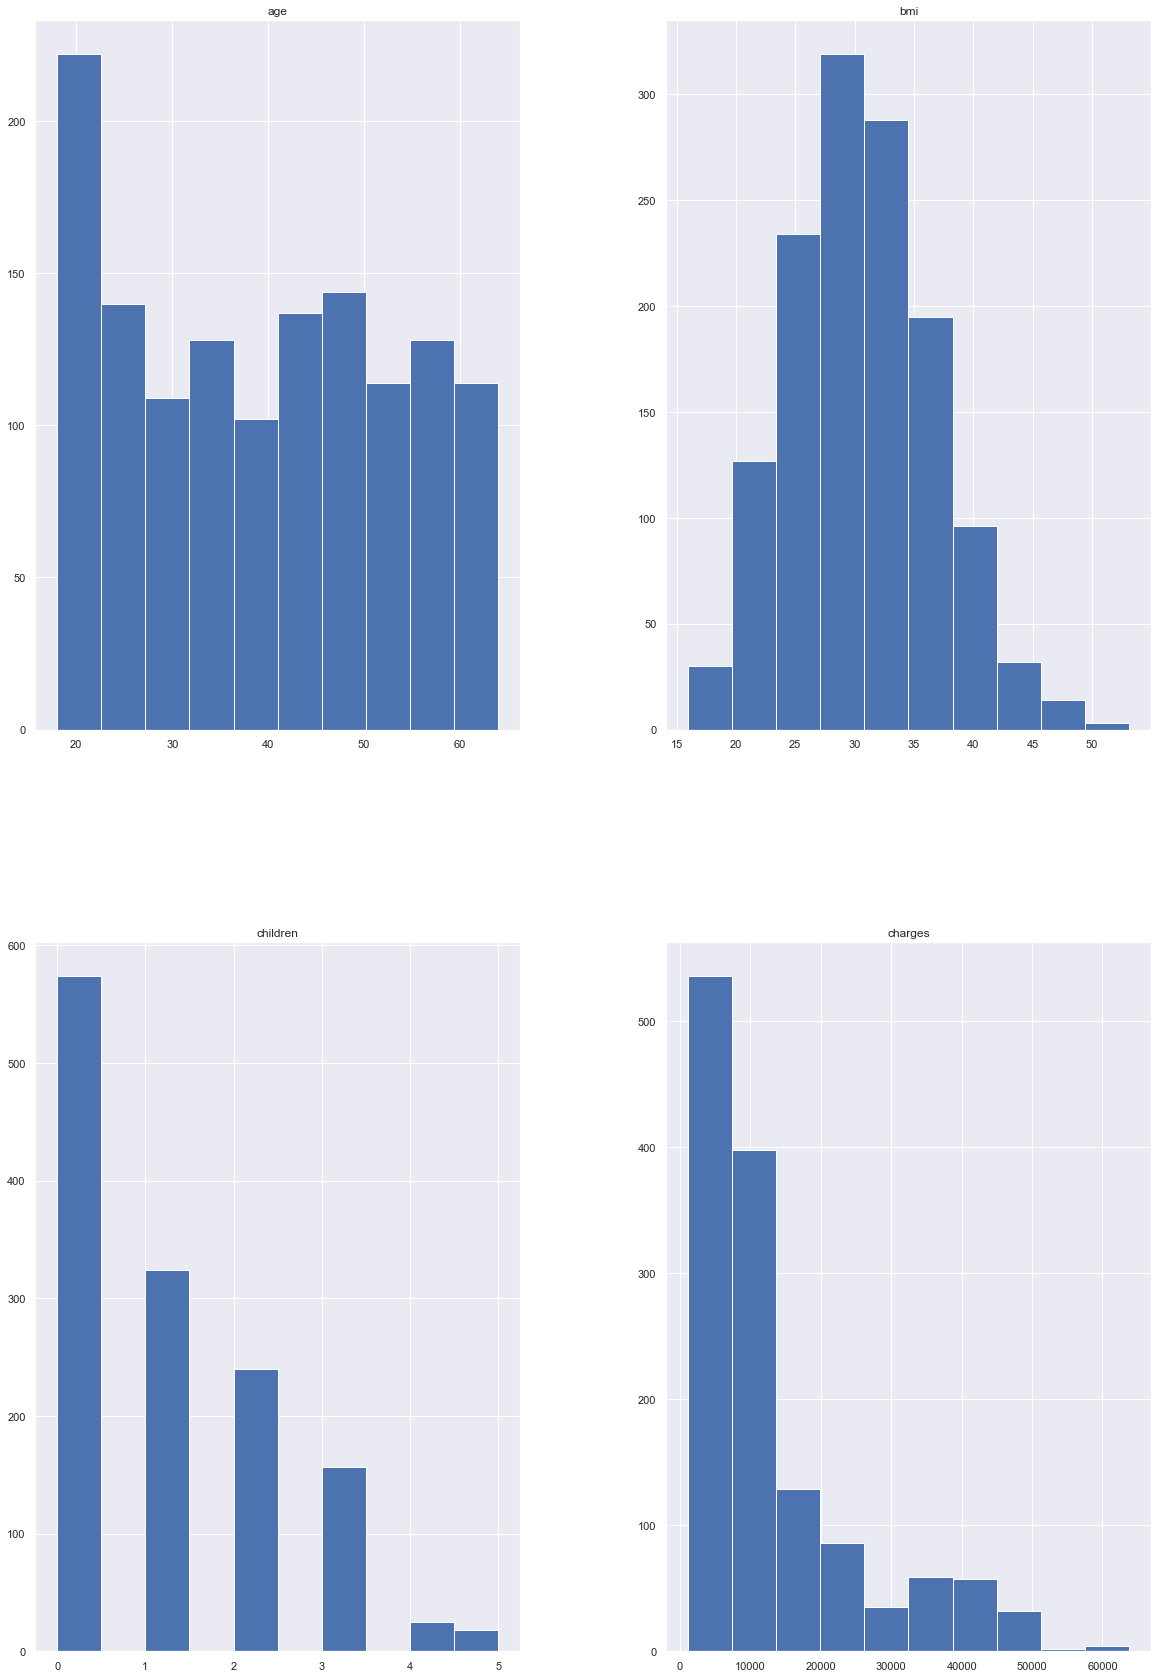

In [16]:
df.hist(figsize=(20,30));

1) bmi looks quiet normally distributed(Almost bell curve)
2) Age seems be be distributed quiet uniformly
3) As seen in the previous step, charges are highly skewed (Right Skewed Since tail is going towards right)

In [17]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


1) Skew of bmi is very less as seen in the previous step
2) age is uniformly distributed and there's hardly any skew(Since it is almost Zero data is uniformly distributed)
3) charges are highly skewed

# Check Outliers

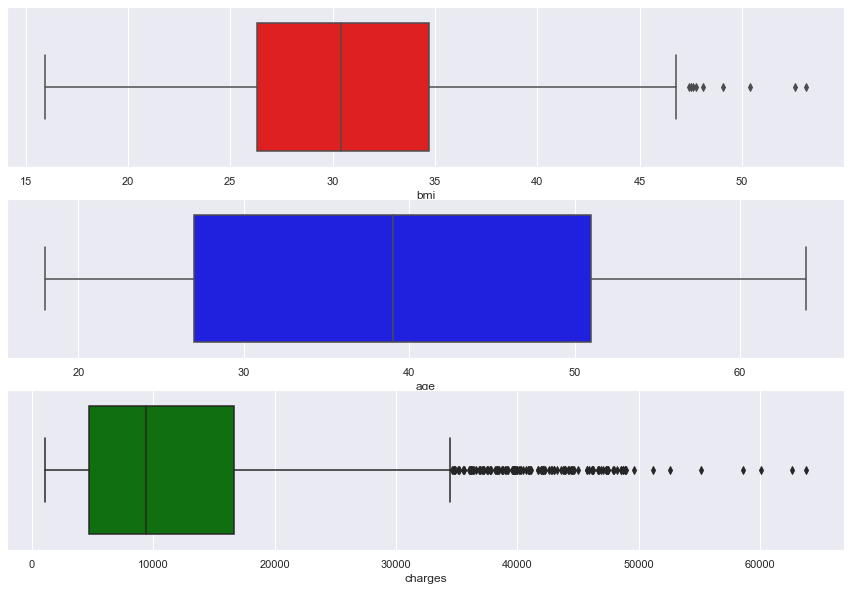

In [19]:
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color='red')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='blue')

plt.subplot(3,1,3)
sns.boxplot(x= df.charges, color='green')

plt.show()

# Plot Count Plot

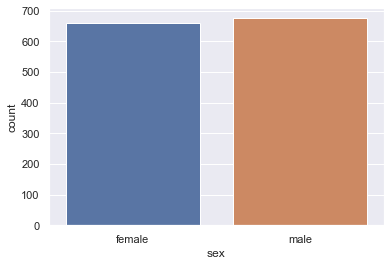

In [20]:
sns.countplot(x=df['sex']);

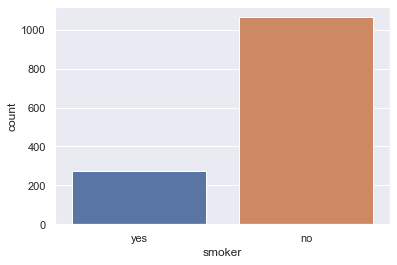

In [21]:
sns.countplot(x=df['smoker']);

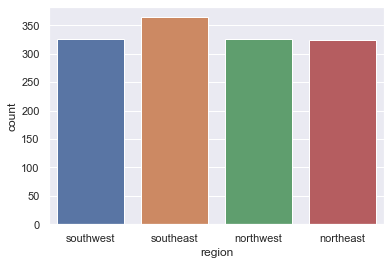

In [22]:
sns.countplot(x=df['region']);

<AxesSubplot:xlabel='children', ylabel='count'>

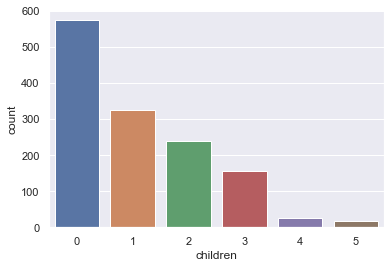

In [24]:
sns.countplot(x=df['children'])

1) There are a lot more non-smokers than there are smokers in the data
2) Instances are distributed evenly accross all regions
3) Gender is also distributed evenly
4) Most instances have less than 2 children and very few have 4 or 5 children

### Bi-variate distribution of every possible attribute pair

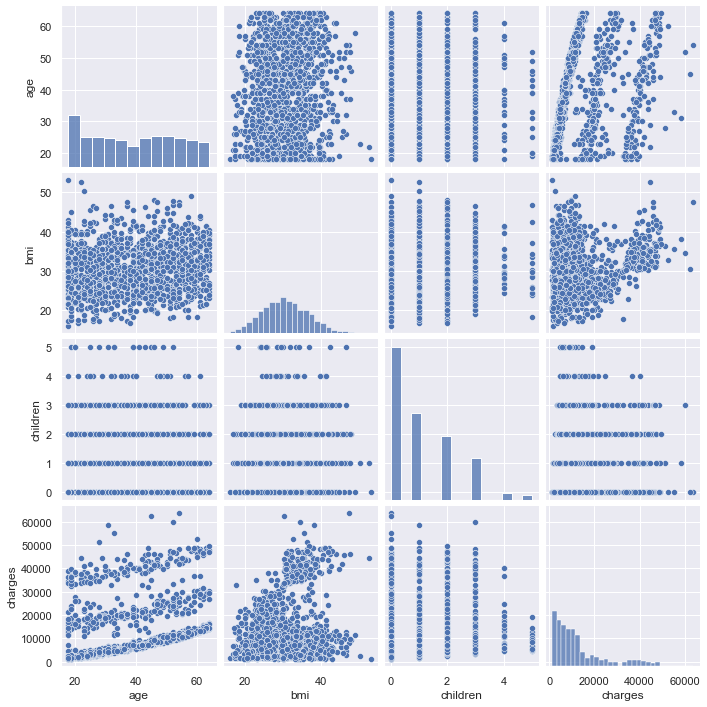

In [26]:
sns.pairplot(df);  #pairplot
plt.show()

# Check Correlation

To find out the correlation we will use the corr function and also we will plot a heatmap to visualise this correlation.

In [27]:
crr = df.corr()
crr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


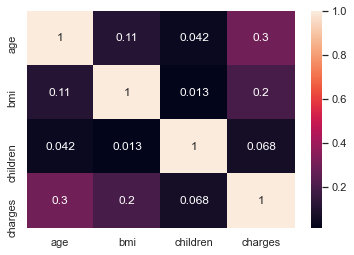

In [30]:
sns.heatmap(crr, annot=True);

## Do charges of people who smoke differ significantly from the people who don't?

In [31]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\kinagabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


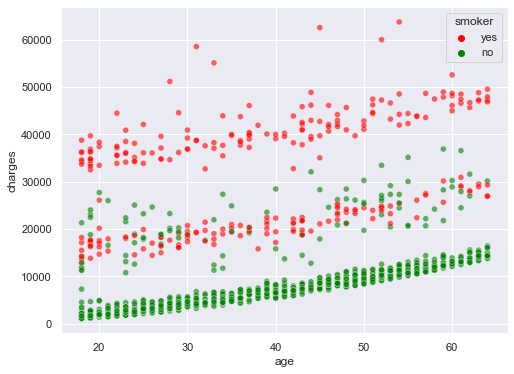

In [33]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'] ,alpha=0.6);


Visually the difference between charges of smokers and charges of non-smokers is apparent.
For Smokers charges is high.

## Does bmi of males differ significantly from that of females?

In [34]:
df.sex.value_counts()   #Checking the distribution of males and females

male      676
female    662
Name: sex, dtype: int64

C:\Users\kinagabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


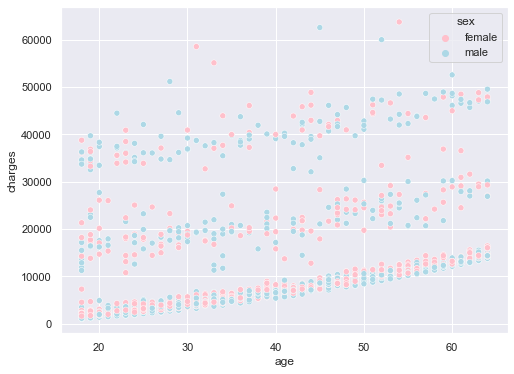

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['pink','lightblue'] );

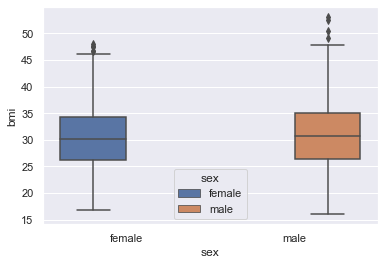

In [40]:
sns.boxplot(x = 'sex', y='bmi', hue = 'sex',data=df);

In [41]:
df.groupby('sex')['bmi'].median()

sex
female    30.1075
male      30.6875
Name: bmi, dtype: float64

From Above boxplot & Median value we infer bmi variation is almost same.